In [3]:
import numpy as np
import pandas as pd

In [4]:
def load_and_describe_dataset(file_path):
    try:
        # Load the dataset
        data = pd.read_csv(file_path)
        return data
        
    except FileNotFoundError:
        print("The specified file was not found. Please check the file path.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [5]:
# Example usage
file_path = 'training_data.csv'
data = load_and_describe_dataset(file_path)


In [6]:
data.head()

,Unnamed: 0,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [7]:
data.shape

(50000, 14)

In [8]:
data.isnull().sum()

Unnamed: 0      0
id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [9]:
data.columns

Index(['Unnamed: 0', 'id', 'brand', 'model', 'model_year', 'milage',
       'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident',
       'clean_title', 'price'],
      dtype='object')

In [10]:
categorical = ['brand', 'model', 'fuel_type', 'engine', 'ext_col', 'int_col', 'transmission']

In [11]:
print ( data[categorical].nunique())

brand             53
model           1825
fuel_type          7
engine          1059
ext_col          258
int_col          123
transmission      46
dtype: int64


In [12]:
print(data['fuel_type'].value_counts())

fuel_type
Gasoline          45546
Hybrid             1624
E85 Flex Fuel      1355
Diesel             1024
–                   278
Plug-In Hybrid      169
not supported         4
Name: count, dtype: int64


In [13]:
print(data.loc[(data['brand'] == 'Audi') & (data['model'].str.startswith('S')), 'model'].value_counts())

model
S4 3.0T Premium Plus         129
S5 3.0T Prestige              64
S4 3.0 Prestige               53
SQ5 3.0T Premium Plus         52
S5 3.0T Premium Plus          42
SQ5 3.0T Prestige             33
S3 2.0T Premium Plus          28
S6 4.0T                       28
S3 2.0T Tech Premium Plus     19
S4 3.0T Premium               18
S6 4.0T Premium Plus          14
S4 Base                       14
S5 3.0 Premium Plus           13
S6 4.0T Prestige              12
S7 2.9T Prestige               9
SQ5 3.0T Premium               9
S8 4.0T Plus                   8
S5 3.0T Premium                6
S7 4.0T Premium Plus           6
S8 4.2 quattro                 6
S5 4.2 Premium Plus            4
SQ8 4.0T Premium Plus          4
S4 4.2 quattro                 4
SQ7 4.0T                       2
S8 4.0T quattro                2
S-Class S 580 4MATIC           2
Sonata Hybrid Limited          1
SC 300 Base                    1
Name: count, dtype: int64


In [15]:
"""-----------------------------EXPLORATORY DATA ANALYSIS--------------------------------"""

import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning and Plotting preparations
# Remove the first two irrelevant columns for analysis purposes
training_data_clean = data.drop(columns=['Unnamed: 0', 'id'])

# 1. Plotting Number of Null Values in Each Feature
null_values = training_data_clean.isnull().sum()
null_values_plot = null_values.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Number of Null Values in Each Feature')
plt.xlabel('Features')
plt.ylabel('Count of Null Values')
plt.tight_layout()
plt.savefig('null_values_plot.png')
plt.close()

# 2. Number of Unique Values in Each Categorical Feature
categorical_features = training_data_clean.select_dtypes(include=['object']).columns
unique_values_categorical = training_data_clean[categorical_features].nunique()
unique_values_categorical_plot = unique_values_categorical.plot(kind='bar', color='lightgreen', figsize=(10, 6))
plt.title('Number of Unique Values in Each Categorical Feature')
plt.xlabel('Categorical Features')
plt.ylabel('Count of Unique Values')
plt.tight_layout()
plt.savefig('unique_values_categorical_plot.png')
plt.close()

# 3. Correlation Map amongst All Features
correlation_data = training_data_clean.select_dtypes(include=[np.number])  # Including only numeric columns for correlation
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Map Amongst Features')
plt.tight_layout()
plt.savefig('correlation_matrix_plot.png')
plt.close()

# 4. Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(training_data_clean['price'], bins=30, kde=True, color='purple')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('price_distribution_plot.png')
plt.close()

# 5. Distribution of Model Year
plt.figure(figsize=(10, 6))
sns.histplot(training_data_clean['model_year'], bins=30, kde=True, color='orange')
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('model_year_distribution_plot.png')
plt.close()

# 6. Distribution of Mileage
plt.figure(figsize=(10, 6))
sns.histplot(training_data_clean['milage'], bins=30, kde=True, color='red')
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('mileage_distribution_plot.png')
plt.close()



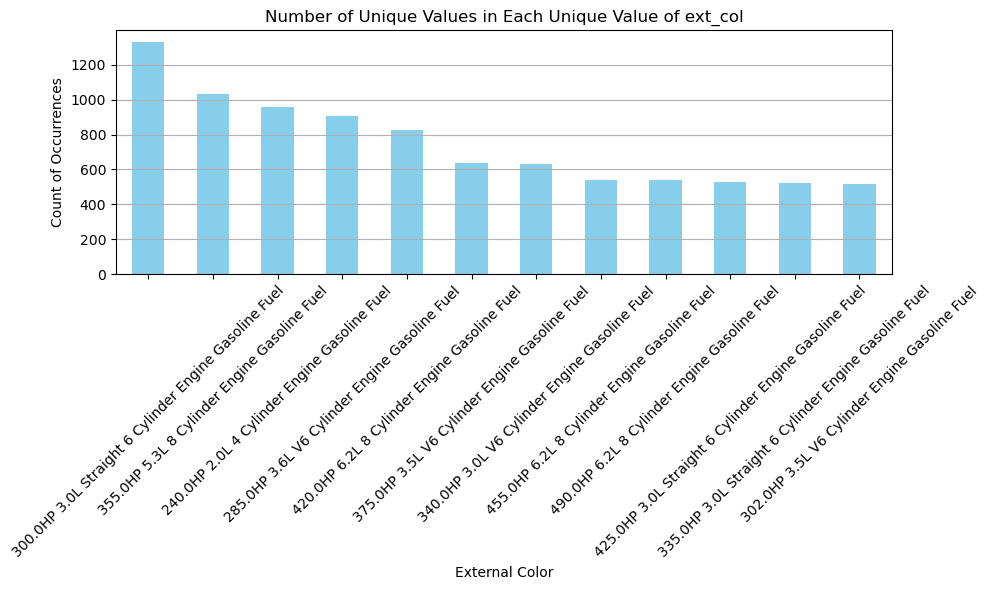

In [112]:
import matplotlib.pyplot as plt
# Count the occurrences of each unique value in 'ext_col'
ext_col_counts = data['engine'].value_counts()
filtered_counts = ext_col_counts[ext_col_counts > 500]
# Plotting the bar graph
plt.figure(figsize=(10, 6))
filtered_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Values in Each Unique Value of ext_col')
plt.xlabel('External Color')
plt.ylabel('Count of Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

count     50000.000000
mean      72828.221860
std       50467.200515
min         100.000000
25%       32437.000000
50%       66250.000000
75%      102000.000000
max      405000.000000
Name: milage, dtype: float64


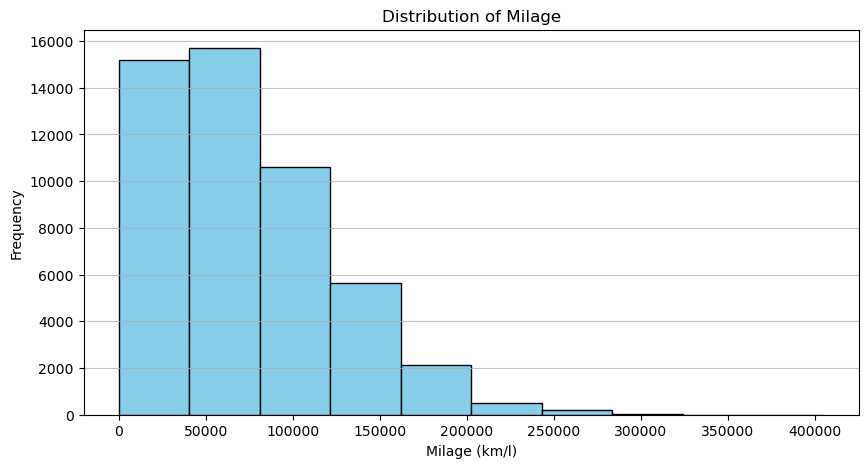

In [113]:
import matplotlib.pyplot as plt

# Basic statistics about the 'milage' feature
milage_stats = data['milage'].describe()
print(milage_stats)

# Plotting the 'milage' feature
plt.figure(figsize=(10, 5))
plt.hist(data['milage'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Milage')
plt.xlabel('Milage (km/l)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [22]:
import re
def extract_horsepower(engine_str):
    match = re.search(r"(\d+\.?\d*)HP", engine_str)
    return float(match.group(1)) if match else None

# Define a function to extract engine capacity using regular expressions
def extract_engine_capacity(engine_str):
    match = re.search(r"(\d+\.?\d*)L", engine_str)
    return float(match.group(1)) if match else None

In [23]:
def feature_engineering(df):
    # Step 1: Create a variable called damage
    df['damage'] = df['accident'].apply(lambda x: 0 if x == 'None reported' else 1)
    
    # Step 2: Create a variable called age
    df['age'] = 2024 - df['model_year']
    
    # 3: Create a variable called ext_popular
    df['ext_common'] = df['ext_col'].apply(lambda x: 1 if x in ['Black', 'White'] else 0)
    df['ext_neutral'] = df['ext_col'].apply(lambda x: 1 if x in ['Gray', 'Silver', 'Blue', 'Red'] else 0)
    
    # Step 4: Create a variable called int_popular
    df['int_common'] = df['int_col'].apply(lambda x: 1 if x == 'Black' else 0)
    df['int_neutral'] = df['int_col'].apply(lambda x: 1 if x in ['Beige', 'Gray'] else 0)
    
    #Step 5: Create a variable called type_transmission
    transmission_mapping = {
    'A/T': 'Automatic',
    '8-Speed A/T': 'Automatic',
    'Transmission w/Dual Shift Mode': 'Semi-Automatic',
    '6-Speed A/T': 'Automatic',
    '6-Speed M/T': 'Manual',
    '7-Speed M/T': 'Manual',
    'M/T': 'Manual',
    'CVT Transmission': 'Automatic',
    '10-Speed A/T': 'Automatic',
    '5-Speed A/T': 'Automatic',
    '9-Speed A/T': 'Automatic',
    '4-Speed A/T': 'Automatic',
    '5-Speed M/T': 'Manual',
    '6-Speed Automatic': 'Automatic',
    '8-Speed Automatic': 'Automatic',
    '10-Speed Automatic': 'Automatic',
    '7-Speed Automatic': 'Automatic',
    '6-Speed Manual': 'Manual',
    '7-Speed Automatic with Auto-Shift': 'Semi-Automatic',
    '6-Speed Electronically Controlled Automatic': 'Automatic',
    '7-Speed DCT Automatic': 'Semi-Automatic',
    '1-Speed A/T': 'Other',
    'Variable': 'Other',
    '1-Speed Automatic': 'Other',
    'SCHEDULED FOR OR IN PRODUCTION': 'Other',  # This may need clarification
    '–': 'Other',  # Placeholder for undefined types
    '8-Speed Manual': 'Manual',
    '4-Speed Automatic': 'Automatic',
    '5-Speed Automatic': 'Automatic',
    '8-Speed Automatic with Auto-Shift': 'Semi-Automatic',
    'Automatic': 'Automatic',
    '6-Speed': 'Other',  # Not specified
    '7-Speed': 'Other',  # Not specified
    # Add any additional specific mappings as necessary
    }

    # Create a new column 'type_transmission' based on the mapping
    df['transmission'] = df['transmission'].map(transmission_mapping).fillna('Other')
    df['Automatic'] = df['transmission'].apply(lambda x: 1 if x == 'Automatic' else 0)
    df['Manual'] = df['transmission'].apply(lambda x: 1 if x == 'Manual' else 0)
    df['Semi'] = df['transmission'].apply(lambda x: 1 if x == 'Semi-Automatic' else 0)
    
    # Step 6: Create popular_engine
    popular_engines = ['300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel', '355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel', '240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel', 
                       '285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel', '420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel', '375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel', 
                       '340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel', '455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel', '490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel', 
                       '425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel', '335.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel', 
                       '302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel']
    df['popular_engine'] = df['engine'].apply(lambda x: 1 if x in popular_engines else 0)
    
    df['horsepower'] = df['engine'].apply(extract_horsepower)
    median_value = df['horsepower'].median()
    df.loc[:, 'horsepower'] = df['horsepower'].fillna(median_value)
    
    df['engine_capacity'] = df['engine'].apply(extract_engine_capacity)
    median_value = df['engine_capacity'].median()
    df.loc[:, 'engine_capacity'] = df['engine_capacity'].fillna(median_value)
    # step 7: 
    brand_mapping = {
    'BMW': 'Luxury', 
    'Ford': 'Affordable',
    'Mercedes-Benz': 'Luxury', 
    'Chevrolet': 'Sports',  
    'Audi': 'Luxury', 
    'Porsche': 'Sports', 
    'Toyota': 'Affordable', 
    'Lexus': 'Luxury', 
    'Jeep': 'Affordable',
    'Land': 'Luxury',  # Assuming Land Rover
    'Cadillac': 'Luxury', 
    'Nissan': 'Affordable', 
    'GMC': 'Affordable', 
    'Dodge': 'Affordable', 
    'RAM': 'Affordable', 
    'INFINITI': 'Luxury', 
    'Lincoln': 'Luxury',
    'Mazda': 'Affordable', 
    'Subaru': 'Affordable', 
    'Hyundai': 'Affordable', 
    'Jaguar': 'Luxury', 
    'Volkswagen': 'Affordable',
    'Honda': 'Affordable', 
    'Acura': 'Luxury', 
    'Kia': 'Affordable', 
    'Volvo': 'Luxury', 
    'MINI': 'Luxury', 
    'Bentley': 'Luxury',
    'Maserati': 'Luxury', 
    'Chrysler': 'Affordable', 
    'Genesis': 'Luxury', 
    'Buick': 'Affordable', 
    'Mitsubishi': 'Affordable',
    'Hummer': 'Affordable', 
    'Pontiac': 'Affordable', 
    'Rolls-Royce': 'Luxury', 
    'Alfa': 'Luxury', 
    'Lamborghini': 'Luxury',
    'Tesla': 'Luxury',  
    'Ferrari': 'Luxury', 
    'Saturn': 'Affordable',
    'Scion': 'Affordable', 
    'Aston': 'Luxury', 
    'McLaren': 'Luxury', 
    'Rivian': 'Affordable', 
    'Mercury': 'Affordable', 
    'FIAT': 'Affordable',
    'Lotus': 'Sports',  
    'Suzuki': 'Affordable',
    'Maybach': 'Luxury', 
    'Lucid': 'Luxury', 
    'Plymouth': 'Affordable', 
    'Bugatti': 'Luxury'
    }

    # Create new feature 'category'
    df['category'] = df['brand'].map(brand_mapping)

    # Define label encoding
    df['Luxury'] = df['category'].apply(lambda x: 1 if x in ['Luxury', 'Sports'] else 0)
    df['Affordable'] = df['category'].apply(lambda x: 1 if x == 'Affordable' else 0)

    # Step 7: Create Gasoline
    df['gasoline'] = df['fuel_type'].apply(lambda x: 1 if x == 'Gasoline' else 0)
    # Step 7: Drop specified columns
    df = df.drop(columns=['clean_title', 'model_year', 'ext_col', 'int_col', 'transmission', 'accident', 'model_year', 'id', 'engine', 'brand', 'model', 'category', 'fuel_type'])
    
    return df

In [24]:
popular_engines = ['300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel', '355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel', '240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel', '285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel', '420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel', '375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel', '340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel', '455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel', '490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel', '425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel', '335.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel', '302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel']

In [25]:
clean_data = feature_engineering(data)
#clean_data = data

In [24]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

def encode_categorical_variables(data, encoding_type='one-hot'):
    """
    Identifies categorical variables and encodes them.
    
    Parameters:
    - data (pd.DataFrame): The input dataset.
    - encoding_type (str): The encoding type ('one-hot' or 'ordinal').
    
    Returns:
    - pd.DataFrame: The dataset with categorical variables encoded.
    """
    # Identify categorical variables
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns
    
    print(f"Categorical columns identified: {list(categorical_cols)}")
    
    if encoding_type == 'one-hot':
        # One-hot encode the categorical columns
        data_encoded = pd.get_dummies(data, columns=categorical_cols)
    elif encoding_type == 'ordinal':
        # Ordinal encode the categorical columns
        encoder = OrdinalEncoder()
        data[categorical_cols] = encoder.fit_transform(data[categorical_cols])
        data_encoded = data
    else:
        raise ValueError("Invalid encoding_type. Choose 'one-hot' or 'ordinal'.")
    
    return data_encoded

# Choose encoding type ('one-hot' or 'ordinal')
encoding_type = 'one-hot'  # Change to 'ordinal' if you want ordinal encoding

# Encode categorical variables
df_encoded = encode_categorical_variables(clean_data, encoding_type=encoding_type)

# Output the result
print("\nEncoded DataFrame:")
print(df_encoded)


Categorical columns identified: ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

Encoded DataFrame:
       Unnamed: 0     id  model_year  milage  price  brand_Acura  brand_Alfa  \
0               0      0        2018   74349  11000        False       False   
1               1      1        2007   80000   8250        False       False   
2               2      2        2009   91491  15000        False       False   
3               3      3        2022    2437  63500        False       False   
4               4      4        2001  111000   7850        False       False   
...           ...    ...         ...     ...    ...          ...         ...   
49995       49995  49995        2018   45617  51000        False       False   
49996       49996  49996        2017   93400  31000        False       False   
49997       49997  49997        2019   71962  36500        False       False   
49998       49998  49998        2017   73

In [26]:
clean_data.head()


,Unnamed: 0,milage,price,damage,age,ext_common,ext_neutral,int_common,int_neutral,Automatic,Manual,Semi,popular_engine,horsepower,engine_capacity,Luxury,Affordable,gasoline
0,0,74349,11000,0,6,0,1,0,1,1,0,0,1,375.0,3.5,0,1,1
1,1,80000,8250,0,17,1,0,1,0,0,0,0,1,300.0,3.0,1,0,1
2,2,91491,15000,0,15,0,0,0,1,1,0,0,0,300.0,4.2,1,0,1
3,3,2437,63500,0,2,0,1,0,0,0,0,0,0,335.0,3.0,1,0,0
4,4,111000,7850,0,23,1,0,1,0,1,0,0,0,200.0,3.8,0,1,1


In [ ]:
df1 =df_encoded.drop(df_encoded.columns[0], axis=1)
df1 = df1[[col for col in df1.columns if col != 'price'] + ['price']]
df1.head()

,id,model_year,milage,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,...,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Yes,price
0,0,2018,74349,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,11000
1,1,2007,80000,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,8250
2,2,2009,91491,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,15000
3,3,2022,2437,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,63500
4,4,2001,111000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,7850


In [27]:
df = clean_data.drop(clean_data.columns[0], axis=1)
df = df[[col for col in df.columns if col != 'price'] + ['price']]
df.head()

,milage,damage,age,ext_common,ext_neutral,int_common,int_neutral,Automatic,Manual,Semi,popular_engine,horsepower,engine_capacity,Luxury,Affordable,gasoline,price
0,74349,0,6,0,1,0,1,1,0,0,1,375.0,3.5,0,1,1,11000
1,80000,0,17,1,0,1,0,0,0,0,1,300.0,3.0,1,0,1,8250
2,91491,0,15,0,0,0,1,1,0,0,0,300.0,4.2,1,0,1,15000
3,2437,0,2,0,1,0,0,0,0,0,0,335.0,3.0,1,0,0,63500
4,111000,0,23,1,0,1,0,1,0,0,0,200.0,3.8,0,1,1,7850


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample data preparation
X = df.iloc[:, :-1]  # All rows and all columns except the last
# Define y as the last column
y = df.iloc[:, -1] 

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
cat_params = {'iterations': 638, 'depth': 8, 'learning_rate': 0.043354231628992886, 'random_strength': 1.544320985771631e-06, 'bagging_temperature': 0.8343078605072228, 'border_count': 235, 'l2_leaf_reg': 4.063335497943242}
params = {'iterations': 179, 'depth': 5, 'learning_rate': 0.17338474251588606, 'random_strength': 1.0456923128361446e-06, 'bagging_temperature': 0.7194506318184232, 'border_count': 247, 'l2_leaf_reg': 18.037542579305022}
from catboost import CatBoostRegressor

# Initialize the CatBoostRegressor
cat_model = CatBoostRegressor(**params,verbose=0,loss_function='RMSE')

# Fit the model
cat_model.fit(X_train, y_train)

# Make predictions (for example, on the test set)
cat_predictions = cat_model.predict(X_test)
mse = mean_squared_error(y_test, cat_predictions)
rmse = mse**0.5
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 64230.44012826628


In [38]:
xgb_params = {'n_estimators': 4650, 'max_depth': 16, 'learning_rate': 0.0015311394660317682, 'subsample': 0.575954897906485, 'colsample_bytree': 0.6100312758334484, 'colsample_bylevel': 0.542428753233367, 'min_child_weight': 1.4304751291059572, 'reg_alpha': 0.7483636817542512, 'reg_lambda': 4.6550196038388085, 'gamma': 1.7367027849593276e-07}
params =  {'n_estimators': 387, 'max_depth': 6, 'learning_rate': 0.0221955891150421, 'subsample': 0.956049799110561, 'colsample_bytree': 0.6020390043948215, 'gamma': 5.356447556257337e-08, 'min_child_weight': 6, 'reg_alpha': 1.282064019440197e-05, 'reg_lambda': 5.1415598885152124e-05}
from xgboost import XGBRegressor
xgb_model = XGBRegressor(**params,objective = 'reg:squarederror', eval_metric= 'rmse')
xgb_model.fit(X_train, y_train)
pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test,pred)
rmse = mse**0.5
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 63620.38733943513


In [39]:
# Create and train the model
RF_model = RandomForestRegressor(
    n_estimators=100,           # Increased number of trees
    max_features='sqrt',        # Use sqrt of features for best split
    max_depth=12,               # Limit the depth of the trees
    min_samples_split=20,        # Require at least 5 samples to split
    min_samples_leaf=20,         # Require at least 2 samples at a leaf node
    bootstrap=True,             # Use bootstrap sampling
    random_state=42,            # For reproducibility
    n_jobs=-1                   # Use all available cores
)
RF_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=20,
                      min_samples_split=20, n_jobs=-1, random_state=42)

In [40]:
# Make predictions
y_pred = RF_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print(f'Mean Squared Error: {rmse}')

Mean Squared Error: 62523.12438110595


In [141]:
# Step 1: Calculate the mean value of the target variable
mean_value = y.mean()

# Step 2: Create an array of mean values with the same length as y
mean_predictions = np.full_like(y, mean_value)

# Step 3: Calculate MSE
mse = mean_squared_error(y, mean_predictions)

# Print the results
print(f"Mean value: {mean_value}")
print(f"Mean Predictions: {mean_predictions}")
print(f"Mean Squared Error (MSE): {mse}")

Mean value: 39255.08416
Mean Predictions: [39255 39255 39255 ... 39255 39255 39255]
Mean Squared Error (MSE): 5413550160.65592


In [35]:
"""----------------ABLATION STUDIES_______________"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor

# Load your data

# Baseline model training and evaluation
params = {'iterations': 179, 'depth': 5, 'learning_rate': 0.17338474251588606, 'random_strength': 1.0456923128361446e-06, 'bagging_temperature': 0.7194506318184232, 'border_count': 247, 'l2_leaf_reg': 18.037542579305022}
from catboost import CatBoostRegressor

# Initialize the CatBoostRegressor
cat_model = CatBoostRegressor(**params,verbose=0,loss_function='RMSE')

# Fit the model
cat_model.fit(X_train, y_train)

# Make predictions (for example, on the test set)
cat_predictions = cat_model.predict(X_test)

baseline_rmse = np.sqrt(mean_squared_error(y_test, cat_predictions))

# Function to perform ablation on features
def ablation_study(features, X_train, X_test, y_train, y_test):
    results = {}
    for feature in features:
        X_train_ablation = X_train.drop(feature, axis=1)
        X_test_ablation = X_test.drop(feature, axis=1)
        
        model = CatBoostRegressor(**params, loss_function='RMSE', verbose=0)
        model.fit(X_train_ablation, y_train)
        predictions = model.predict(X_test_ablation)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        
        results[feature] = rmse
    return results

# Perform ablation study
ablation_results = ablation_study(X.columns, X_train, X_test, y_train, y_test)

# Compare the RMSE values to baseline
feature_impact = {feature: baseline_rmse - rmse for feature, rmse in ablation_results.items()}
sorted_feature_impact = sorted(feature_impact.items(), key=lambda x: x[1], reverse=True)

# Plotting
import matplotlib.pyplot as plt

features, impacts = zip(*sorted_feature_impact)
plt.figure(figsize=(10, 8))
plt.barh(features, impacts, color='skyblue')
plt.xlabel('Increase in RMSE')
plt.title('Impact of Feature Removal on Model Performance')
plt.gca().invert_yaxis()  # Highest impact at the top
plt.tight_layout()
plt.savefig('feature_ablation_impact.png')
plt.close()




In [36]:
feature_importances = cat_model.feature_importances_
feature_names = X_train.columns  # Ensure your training data has column names

# Create a DataFrame to hold feature names and their corresponding importance
import pandas as pd
features_df = pd.DataFrame({'Features': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(features_df['Features'], features_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances from CatBoost Model')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.close()


In [142]:
test = pd.read_csv("testing_data.csv")

In [143]:
test.head()

,Unnamed: 0.1,Unnamed: 0,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,0,50001,50001,Nissan,Xterra S,2008,167000,Gasoline,261.0HP 4.0L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes
1,1,50002,50002,Audi,Q5 2.0T Premium Plus,2018,52500,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Gray,White,At least 1 accident or damage reported,Yes
2,2,50003,50003,Acura,MDX Sport Hybrid 3.0L w/Technology Package,2019,56778,Hybrid,321.0HP Electric Motor Electric Fuel System,7-Speed A/T,Black,Black,None reported,Yes
3,3,50004,50004,GMC,Yukon XL SLT,2017,110000,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes
4,4,50005,50005,BMW,M3 Base,2008,57500,Gasoline,414.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,6-Speed M/T,White,White,None reported,Yes


In [144]:
test.shape


(4272, 14)

In [145]:
clean_test = feature_engineering(test)

In [146]:
clean_test.head()

,Unnamed: 0.1,Unnamed: 0,milage,damage,age,popular_engine,horsepower,engine_capacity,Luxury,Affordable
0,0,50001,167000,1,16,0,261.0,4.0,0,1
1,1,50002,52500,1,6,0,252.0,2.0,1,0
2,2,50003,56778,0,5,0,321.0,3.5,1,0
3,3,50004,110000,0,7,1,355.0,5.3,0,1
4,4,50005,57500,0,16,0,414.0,4.0,1,0


In [147]:
df = clean_test.drop(clean_test.columns[0:2],axis=1)
#clean_test= clean_test.drop(clean_test.columns[0],axis=1)
df.head()

,milage,damage,age,popular_engine,horsepower,engine_capacity,Luxury,Affordable
0,167000,1,16,0,261.0,4.0,0,1
1,52500,1,6,0,252.0,2.0,1,0
2,56778,0,5,0,321.0,3.5,1,0
3,110000,0,7,1,355.0,5.3,0,1
4,57500,0,16,0,414.0,4.0,1,0


In [148]:
cat = cat_model.predict(df)
xgb = xgb_model.predict(df)
rf = RF_model.predict(df)
pred = (cat+xgb+rf)/3

In [150]:
pred.mean()

39689.21963516679

In [102]:
submission = pd.DataFrame({'id': test.id, 'price': pred})
submission.head()

,id,price
0,50001,9789.302488
1,50002,32055.848254
2,50003,38096.576434
3,50004,34844.021094
4,50005,37951.468967


In [103]:
submission.to_csv('submission.csv', index=False)

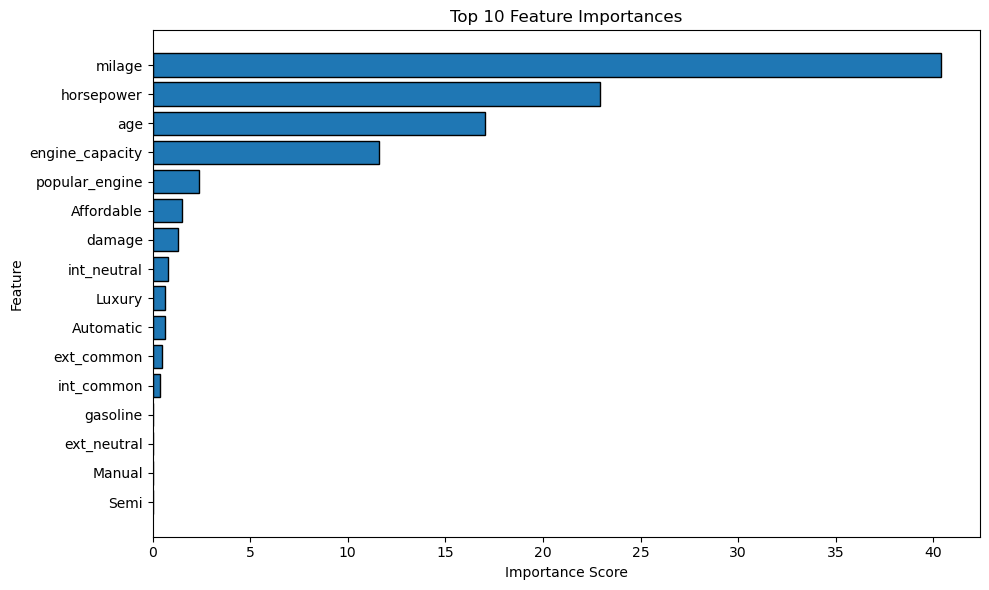

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume `rf_model` is your trained Random Forest model and `feature_names` contains feature names

# Get feature importances and feature names
feature_importances = cat_model.feature_importances_
feature_names = X_train.columns  # Replace with your feature names

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20], edgecolor='black')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
